<a href="https://colab.research.google.com/github/Samarjeet-singh-chhabra/USD_INR_Forecast/blob/main/USD_INR_LSTM_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **USD-INR CONVERSION RATE FORECAST**

Using machine learning and deep learning techniques, we analyze and forecast the USD-INR conversion rate data from Jan 2010 to May 2023. With insights into historical trends, patterns, and future projections, this analysis aids traders, investors, and policymakers in understanding and predicting exchange rate dynamics.

# **PROBLEM STATEMENT**




*   Analyzing the historical trends and patterns of USD-INR conversion rates from January 2010 to May 2023 to gain insights into the economic dynamics.
*  Forecasting future USD-INR exchange rates using machine learning and deep learning techniques to aid economists, financial analysts, and policymakers in making informed decisions.
*  Identifying significant macroeconomic indicators and market variables that impact the fluctuations in the USD-INR conversion rate, providing valuable insights for economic forecasting and risk management.
*  Assessing the predictive accuracy and performance of the forecasting models to enhance the reliability of exchange rate predictions and facilitate effective financial planning.
*  Enabling traders, investors, and policymakers to understand the USD-INR exchange rate dynamics, anticipate market trends, and devise appropriate strategies to optimize trade, investments, and policy decisions in the global economy.








# **UNDERSTANDING THE PROBLEM IN BUSINESS CONTEXT**



Analyzing the USD-INR conversion rate from 2010 to 2023 benefits businesses, investors, and policymakers. It enables informed decisions on international transactions, pricing, currency hedging, and risk management. Investors can optimize strategies, while policymakers can shape monetary policies for economic stability. This analysis empowers stakeholders to navigate the dynamic global economy with insights on exchange rate dynamics, fostering growth and profitability.

# **GITHUB LINK**


www.github.com

# <b>DATA UNDERSTANDING</b>



The dataset has 3498 obervasations and , 7 columns/features.
The dataset used for this analysis spans from January 2010 to May 2023 and comprises the following columns:


**Date**: The date of the recorded exchange rate data.

**Price**: The closing price of USD-INR conversion on that particular date.

**Open**: The opening price of USD-INR conversion on that particular date.

**High**: The highest price of USD-INR conversion during that day.

**Low**: The lowest price of USD-INR conversion during that day.

**Volume**: The trading volume of USD-INR currency pair on that day.

**Chg%**: The percentage change in USD-INR conversion rate compared to the previous day.

# **DATASET LOADING AND OVERVIEW**

## Importing Libraries and Modules.

In [1]:
!pip install keras

!pip install tensorflow

!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 4.9 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
ERROR: Could not build wheels for fbprophet, which is required to install pyproject.toml-based projects


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.optimizers import Adam
import keras.backend as K
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.models import load_model
import tensorflow as tf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from tensorflow import keras
import torch
from torch import nn
from prophet import Prophet
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from statsmodels.tsa.seasonal import seasonal_decompose
from keras.preprocessing.sequence import TimeseriesGenerator


## Dataset Loading

In [3]:
# Adding Data set throught link.
url = "https://drive.google.com/file/d/1XbwUy_IWIwhVlyAGcoFBLEMFOEGZW0Oq/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

# Naming our dataset
df =  pd.read_csv(url,  encoding= 'unicode_escape')


In [4]:
# Creating a copy, for working on it without harming the orignal dataset.
inr_df = df.copy()


## Data Overview

In [5]:
# checking top 5 Rows or instances.
inr_df.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,30-05-2023,82.665,82.557,82.794,82.548,0,0.0010
1,29-05-2023,82.586,82.591,82.682,82.511,0,0.0002
2,26-05-2023,82.570,82.745,82.748,82.542,0,-0.0020
3,25-05-2023,82.733,82.680,82.821,82.666,0,0.0008
4,24-05-2023,82.670,82.880,82.897,82.570,0,-0.0019


In [6]:
# checking last 5 Rows or instances.
inr_df.tail()

,Date,Price,Open,High,Low,Volume,Chg%
3493,07-01-2010,45.650,45.610,45.890,45.570,0,-0.0010
3494,06-01-2010,45.695,46.165,46.205,45.695,0,-0.0110
3495,05-01-2010,46.205,46.305,46.305,46.045,0,-0.0019
3496,04-01-2010,46.295,46.545,46.655,46.245,0,-0.0069
3497,01-01-2010,46.615,46.610,46.677,46.590,0,0.0044


In [7]:

# checking total rows and columns ( Rows, Columns).
inr_df.shape

(3498, 7)

Some insights:-
1.  We have 3498 instances and 87 features.

In [8]:
# checking basic information of all columns such as datatype, total number null values present, memory usage etc.
inr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498 entries, 0 to 3497
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3498 non-null   object 
 1   Price   3498 non-null   float64
 2   Open    3498 non-null   float64
 3   High    3498 non-null   float64
 4   Low     3498 non-null   float64
 5   Volume  3498 non-null   int64  
 6   Chg%    3498 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 191.4+ KB


Some insights:-
1. We do not have any null values present in any column
2. We have 1 column which has object data type. others are either float64 or int64.

In [9]:
# Checking description of all data types columns.
inr_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,3498,3498,30-05-2023,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,3498.0,NaN,NaN,NaN,64.195728,10.44942,43.925,55.9375,65.3925,72.5275,83.013
Open,3498.0,NaN,NaN,NaN,64.188665,10.462057,43.89,55.96375,65.36,72.52375,82.991
High,3498.0,NaN,NaN,NaN,64.377566,10.449764,43.975,56.235,65.4925,72.718,83.268
Low,3498.0,NaN,NaN,NaN,64.028006,10.465924,43.83,55.6875,65.24,72.3445,82.776
Volume,3498.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chg%,3498.0,NaN,NaN,NaN,0.000175,0.004304,-0.0327,-0.0021,0.0,0.0022,0.0376


In [10]:
# Checking for unique values in each column
inr_df.nunique()

Date      3498
Price     2829
Open      2918
High      2929
Low       2904
Volume       1
Chg%       273
dtype: int64

In [11]:
# columns in our dataset
inr_df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='object')

# **DATASET CLEANUP**

## Date Column Datatype Conversion to datetime64

In [12]:
# Making date column into datetime64 datatype
inr_df['Date'] = pd.to_datetime(inr_df["Date"], format='%d-%m-%Y')

# Sorting index column Date
inr_df.sort_values(by='Date', inplace=True, ascending=False)


## Missing Value check

In [13]:
# Generate sequence of expected dates
expected_dates = pd.date_range(start=inr_df['Date'].min(), end=inr_df['Date'].max(), freq='D')

# Find missing or skipped dates
missing_dates = expected_dates[~expected_dates.isin(inr_df['Date'])]
print(".............................")

# Print the missing dates
print(missing_dates)
print(".............................")

# Number of missing dates
print("Number of dates missing" ,len(missing_dates))
print(".............................")

# Number of dates that should exist
print("Number of dates should exist" ,len(expected_dates))
print(".............................")

# Number of dates we have
print("Number of dates should exist" ,inr_df.count(1))
print(".............................")

.............................
DatetimeIndex(['2010-01-02', '2010-01-03', '2010-01-09', '2010-01-10',
               '2010-01-16', '2010-01-17', '2010-01-23', '2010-01-24',
               '2010-01-30', '2010-01-31',
               ...
               '2023-04-29', '2023-04-30', '2023-05-06', '2023-05-07',
               '2023-05-13', '2023-05-14', '2023-05-20', '2023-05-21',
               '2023-05-27', '2023-05-28'],
              dtype='datetime64[ns]', length=1400, freq=None)
.............................
Number of dates missing 1400
.............................
Number of dates should exist 4898
.............................
Number of dates should exist 0       7
1       7
2       7
3       7
4       7
       ..
3493    7
3494    7
3495    7
3496    7
3497    7
Length: 3498, dtype: int64
.............................


## Handling missing values

In [14]:
# Append new rows for missing dates and fill values with 5-day moving average
for date in missing_dates:

  # Taking 2 days data after the date
  last_five_days = inr_df[inr_df['Date'] > date ].tail(2)

  # Taking 2 days data prior the date
  first_five_days = inr_df[inr_df['Date'] < date ].head(2)

  # Concatenate the DataFrames vertically
  concatenated_df = pd.concat([first_five_days, last_five_days])


  # Creating the missing date data and appending it to our main data frame
  moving_avg = concatenated_df.mean().round(3)
  inr_df = inr_df.append({'Date': date, 'Price': moving_avg['Price'], 'Open': moving_avg['Open'],
                          'High': moving_avg['High'], 'Low': moving_avg['Low'],
                          'Volume': moving_avg['Volume'], 'Chg%': moving_avg['Chg%']},
                          ignore_index=True)
  # Sort the DataFrame by the 'Date' column
  inr_df.sort_values(by='Date', inplace=True, ascending=False)

  # Reset the index
  inr_df.reset_index(drop=True, inplace=True)



# Sort the DataFrame by the 'Date' column
inr_df.sort_values(by='Date', inplace=True, ascending=False)

# Reset the index
inr_df.reset_index(drop=True, inplace=True)

# Print the updated DataFrame
print(inr_df)




Streaming output truncated to the last 5000 lines.
<ipython-input-14-31bb89fc810f>:15: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  moving_avg = concatenated_df.mean().round(3)
<ipython-input-14-31bb89fc810f>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  inr_df = inr_df.append({'Date': date, 'Price': moving_avg['Price'], 'Open': moving_avg['Open'],
<ipython-input-14-31bb89fc810f>:15: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  moving_avg = concatenated_df.mean().round(3)
<ipython-input-14-31bb89fc810f>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  inr_df = inr_df.append({'Date': date, 'Price': moving_avg

           Date   Price    Open    High     Low  Volume    Chg%
0    2023-05-30  82.665  82.557  82.794  82.548     0.0  0.0010
1    2023-05-29  82.586  82.591  82.682  82.511     0.0  0.0002
2    2023-05-28  82.615  82.634  82.746  82.542     0.0 -0.0000
3    2023-05-27  82.639  82.643  82.761  82.567     0.0 -0.0000
4    2023-05-26  82.570  82.745  82.748  82.542     0.0 -0.0020
...         ...     ...     ...     ...     ...     ...     ...
4893 2010-01-05  46.205  46.305  46.305  46.045     0.0 -0.0019
4894 2010-01-04  46.295  46.545  46.655  46.245     0.0 -0.0069
4895 2010-01-03  46.372  46.487  46.546  46.293     0.0 -0.0010
4896 2010-01-02  46.372  46.487  46.546  46.293     0.0 -0.0010
4897 2010-01-01  46.615  46.610  46.677  46.590     0.0  0.0044

[4898 rows x 7 columns]


<ipython-input-14-31bb89fc810f>:15: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  moving_avg = concatenated_df.mean().round(3)
<ipython-input-14-31bb89fc810f>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  inr_df = inr_df.append({'Date': date, 'Price': moving_avg['Price'], 'Open': moving_avg['Open'],
<ipython-input-14-31bb89fc810f>:15: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  moving_avg = concatenated_df.mean().round(3)
<ipython-input-14-31bb89fc810f>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  inr_df = inr_df.append({'Date': date, 'Price': moving_avg['Price'], 'Open': moving_avg['Open'],
<ipython-inp

## Rechecking for missing dates

In [15]:
# Generate sequence of expected dates
expected_dates = pd.date_range(start=inr_df['Date'].min(), end=inr_df['Date'].max(), freq='D')

# Find missing or skipped dates
missing_dates = expected_dates[~expected_dates.isin(inr_df['Date'])]
print(".............................")

# Print the missing dates
print(missing_dates)
print(".............................")

# Number of missing dates
print("Number of dates missing" ,len(missing_dates))
print(".............................")

# Number of dates that should exist
print("Number of dates should exist" ,len(expected_dates))
print(".............................")

# Number of dates we have
print("Number of dates should exist" ,inr_df.count(1))
print(".............................")

.............................
DatetimeIndex([], dtype='datetime64[ns]', freq='D')
.............................
Number of dates missing 0
.............................
Number of dates should exist 4898
.............................
Number of dates should exist 0       7
1       7
2       7
3       7
4       7
       ..
4893    7
4894    7
4895    7
4896    7
4897    7
Length: 4898, dtype: int64
.............................


## Null values check

In [16]:
# Missing values check
inr_df.isna().sum()

Date      0
Price     0
Open      0
High      0
Low       0
Volume    0
Chg%      0
dtype: int64

## Final Shape Check

In [17]:
inr_df.shape

(4898, 7)

In [18]:
inr_df.head(10)

,Date,Price,Open,High,Low,Volume,Chg%
0,2023-05-30,82.665,82.557,82.794,82.548,0.0,0.0010
1,2023-05-29,82.586,82.591,82.682,82.511,0.0,0.0002
2,2023-05-28,82.615,82.634,82.746,82.542,0.0,-0.0000
3,2023-05-27,82.639,82.643,82.761,82.567,0.0,-0.0000
4,2023-05-26,82.570,82.745,82.748,82.542,0.0,-0.0020
5,2023-05-25,82.733,82.680,82.821,82.666,0.0,0.0008
6,2023-05-24,82.670,82.880,82.897,82.570,0.0,-0.0019
7,2023-05-23,82.830,82.835,82.890,82.749,0.0,-0.0001
8,2023-05-22,82.840,82.809,82.903,82.725,0.0,-0.0005
9,2023-05-21,82.841,82.782,82.908,82.677,0.0,0.0010


## Dropping unnecessary features

In [19]:
# Dropping unusefull' features
inr_df.drop(["Volume", "Chg%", "Open", "High", "Low"], axis=1, inplace=True)

Explaination:-
*  Since Volume has no affect on Price variable so we will drop this column from our dataset.



# **EDA**

## 1. Price in INR vs Year

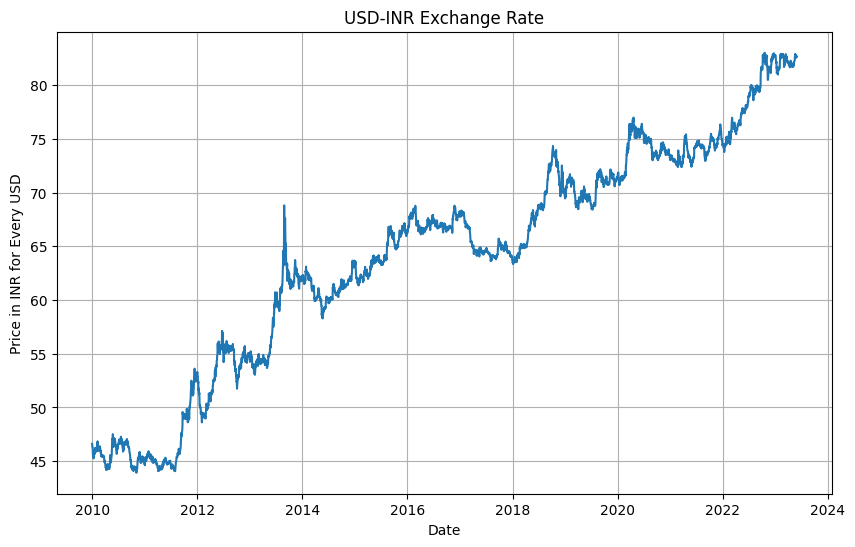

In [20]:
# Plotting the 'Price' column
plt.figure(figsize=(10, 6))
plt.plot(inr_df['Date'], inr_df['Price'])
plt.xlabel('Date')
plt.ylabel('Price in INR for Every USD')
plt.title('USD-INR Exchange Rate')
plt.grid(True)
plt.show()

## 2. Price in INR vs Months vs Year

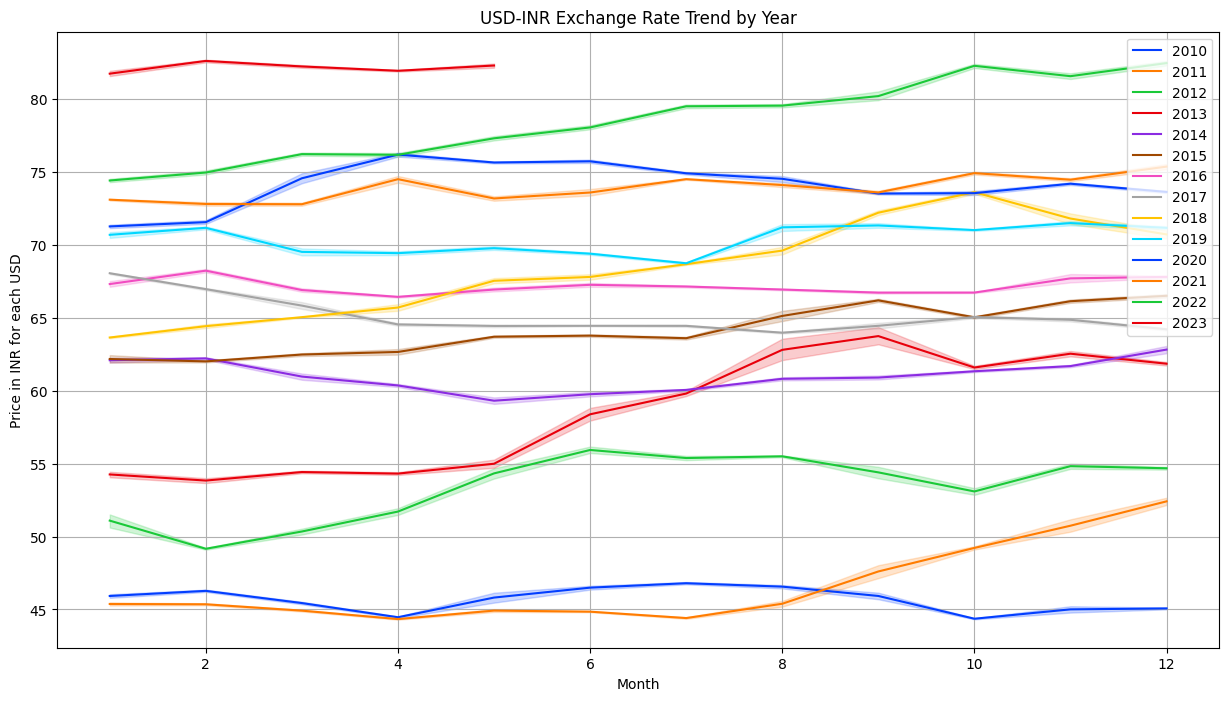

In [21]:
# Extract year and month from the Date column
inr_df['Year'] = inr_df['Date'].dt.year
inr_df['Month'] = inr_df['Date'].dt.month

# Plotting the bivariate line graph
plt.figure(figsize=(15, 8))
sns.lineplot(data=inr_df, x='Month', y='Price', hue='Year', palette="bright")
plt.xlabel('Month')
plt.ylabel('Price in INR for each USD')
plt.title('USD-INR Exchange Rate Trend by Year')
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper right')

plt.show()

In [22]:
inr_df

,Date,Price,Year,Month
0,2023-05-30,82.665,2023,5
1,2023-05-29,82.586,2023,5
2,2023-05-28,82.615,2023,5
3,2023-05-27,82.639,2023,5
4,2023-05-26,82.570,2023,5
...,...,...,...,...
4893,2010-01-05,46.205,2010,1
4894,2010-01-04,46.295,2010,1
4895,2010-01-03,46.372,2010,1
4896,2010-01-02,46.372,2010,1


## Trend Seasonal and Residual

In [23]:
# Set the 'Date' column as the index
inr_df.set_index('Date', inplace=True)

# Generate a new index with a daily frequency
new_index = pd.date_range(start=inr_df.index.min(), end=inr_df.index.max(), freq='D')

# Reindex the DataFrame with the new index
inr_df = inr_df.reindex(new_index)


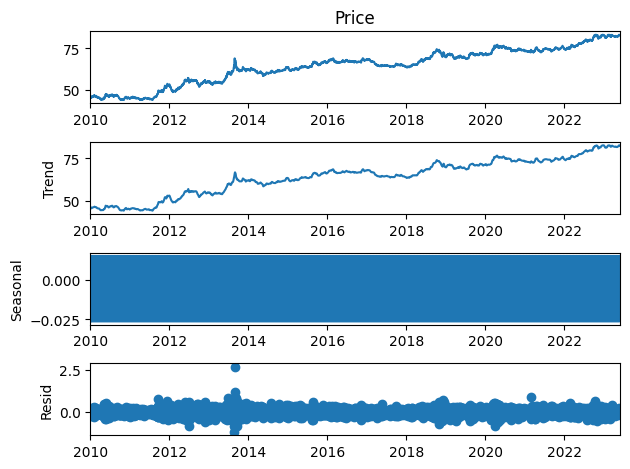

In [24]:
results = seasonal_decompose(inr_df['Price'])
results.plot();

In [25]:
inr_df.head()

,Price,Year,Month
2010-01-01,46.615,2010,1
2010-01-02,46.372,2010,1
2010-01-03,46.372,2010,1
2010-01-04,46.295,2010,1
2010-01-05,46.205,2010,1


# **MODEL TRAINING**

## Train and Test Data

In [26]:
# Creating copy for model training
df= inr_df.copy()

# Printing Head
df.head()

,Price,Year,Month
2010-01-01,46.615,2010,1
2010-01-02,46.372,2010,1
2010-01-03,46.372,2010,1
2010-01-04,46.295,2010,1
2010-01-05,46.205,2010,1


In [27]:
# Extract the "Price" column as a separate DataFrame
price_data = df[["Price"]]

# Split the data into train and test sets
train_data_old, test_data_old = train_test_split(price_data, test_size=0.2, shuffle=False)

# Convert train and test data to 2-dimensional arrays
train_price = np.array(train_data_old).reshape(-1, 1)
test_price = np.array(test_data_old).reshape(-1, 1)

# Print the shapes of train and test data
print("Train Data Shape:", train_price.shape)
print("Test Data Shape:", test_price.shape)

Train Data Shape: (3918, 1)
Test Data Shape: (980, 1)


In [28]:
train_price[:5], test_price[-5:]

(array([[46.615],
        [46.372],
        [46.372],
        [46.295],
        [46.205]]),
 array([[82.57 ],
        [82.639],
        [82.615],
        [82.586],
        [82.665]]))

## Standardization of data

In [29]:
# Apply standardization to the 'Price' column in the training and testing  set
scaler = StandardScaler()

train_price_scaled = scaler.fit_transform(train_price)

test_price_scaled = scaler.transform(test_price)

# Print the shapes of the scaled training and test sets
print("Scaled Training Data Shape:", train_price_scaled.shape)
print("Scaled Test Data Shape:", test_price_scaled.shape)

Scaled Training Data Shape: (3918, 1)
Scaled Test Data Shape: (980, 1)


In [30]:
train_price_scaled[:5], test_price_scaled[-5:]

(array([[-1.58246966],
        [-1.60917346],
        [-1.60917346],
        [-1.61763515],
        [-1.62752545]]),
 array([[2.3687029 ],
        [2.37628546],
        [2.37364804],
        [2.37046117],
        [2.37914265]]))

## Plotting PACF to find best lag value

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


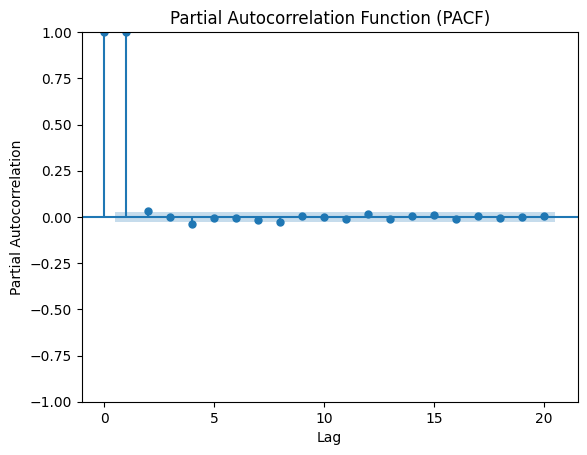

In [31]:
# PACF plot
plot_pacf(inr_df["Price"], lags=20)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


Explaination:-
*   So the best lag value for us is 7.

##  Creating y_train and y_test variable with shift of 7 to train on.

### Plotting PACF to find best lag value

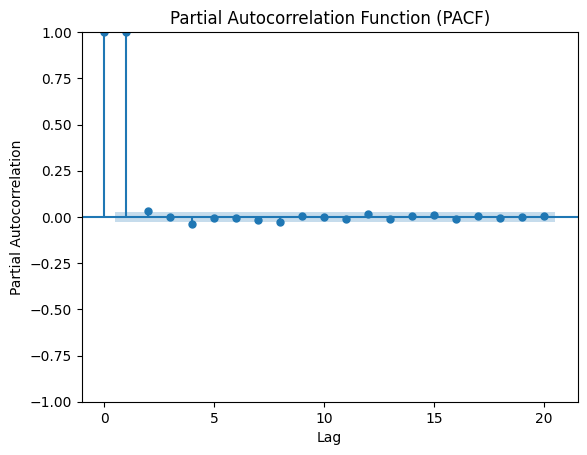

In [32]:
# PACF plot
plot_pacf(inr_df["Price"], lags=20)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


Explaination:-
*   So the best lag value for us is 7.

### Creating Shifted Data

In [33]:
import numpy as np

# Create a lagged series with a shift of 7 for train data
train_lagged = np.concatenate((np.full((7, 1), np.nan), train_price_scaled[:-7]), axis=0)

# Create a lagged series with a shift of 7 for test data
test_lagged = np.concatenate((np.full((7, 1), np.nan), test_price_scaled[:-7]), axis=0)

# Print the shapes of the aligned lagged series
print("Train Lagged Shape:", train_lagged.shape)
print("Test Lagged Shape:", test_lagged.shape)


Train Lagged Shape: (3918, 1)
Test Lagged Shape: (980, 1)


In [34]:
# Making them of equal lenght
X_train = train_price_scaled[7:]
y_train = train_lagged[7:]


X_test = test_price_scaled[7:]
y_test = test_lagged[7:]

### Visualizing train and test data

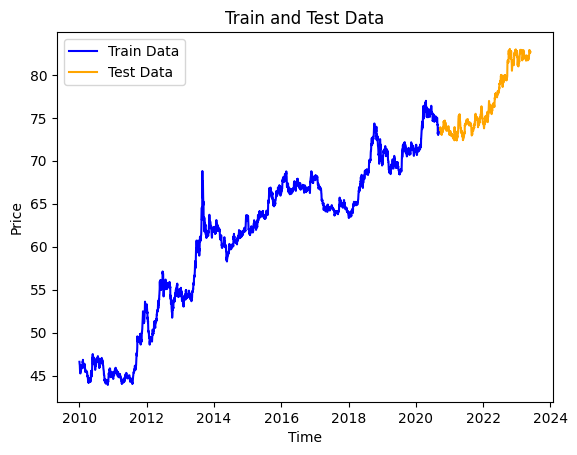

In [35]:
# Plot train and test data
plt.plot(train_data_old, color='blue', label='Train Data')
plt.plot(test_data_old, color='orange', label='Test Data')

# Set plot labels and title
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Train and Test Data')

# Add legend
plt.legend()

# Show the plot
plt.show()

## SVR Model

### Model training

In [36]:
# Create and fit the SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predict on the test set
y_pred = svr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Actual vs Predicted Graph



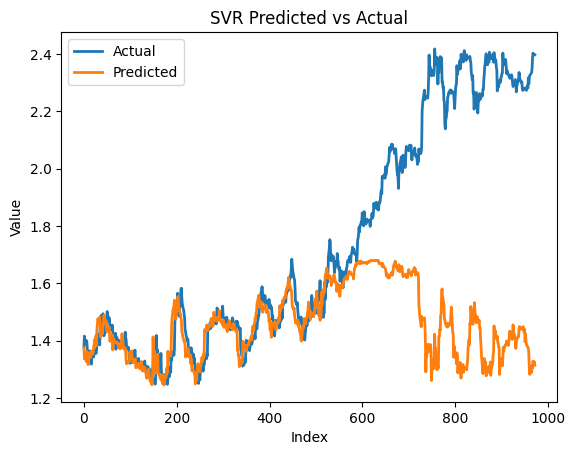

In [37]:
# Plotting the predicted and actual values
plt.plot(y_test, linestyle='-', linewidth=2, label='Actual')
plt.plot(y_pred, linestyle='-', linewidth=2, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.title('SVR Predicted vs Actual')
plt.show()

### Model evaluation

In [38]:
# Calculate R-squared (R²) score
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print("R-squared (R²) Score:", r2)
print("Mean Squared Error (MSE):", mse)


R-squared (R²) Score: -0.5740353797510152
Mean Squared Error (MSE): 0.23821281232575306


## Single Layer neural network

### Model Training

In [39]:
# Clear the existing TensorFlow graph and reset the Keras session
K.clear_session()

# Create the sequential model
model = Sequential()

# Add dense layers
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],1,1)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

# Make predictions on X_test
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
245/245 [==============================] - 1s 2ms/step - loss: 0.1192
Epoch 2/20
245/245 [==============================] - 1s 3ms/step - loss: 0.0080
Epoch 3/20
245/245 [==============================] - 1s 3ms/step - loss: 0.0052
Epoch 4/20
245/245 [==============================] - 1s 3ms/step - loss: 0.0042
Epoch 5/20
245/245 [==============================] - 1s 3ms/step - loss: 0.0040
Epoch 6/20
245/245 [==============================] - 1s 2ms/step - loss: 0.0039
Epoch 7/20
245/245 [==============================] - 1s 2ms/step - loss: 0.0039
Epoch 8/20
245/245 [==============================] - 1s 3ms/step - loss: 0.0039
Epoch 9/20
245/245 [==============================] - 1s 2ms/step - loss: 0.0039
Epoch 10/20
245/245 [==============================] - 1s 2ms/step - loss: 0.0039
Epoch 11/20
245/245 [==============================] - 1s 2ms/step - loss: 0.0040
Epoch 12/20
245/245 [==============================] - 1s 3ms/step - loss: 0.0039
Epoch 13/20
245/245 [====

### Actual vs Predicted Graph



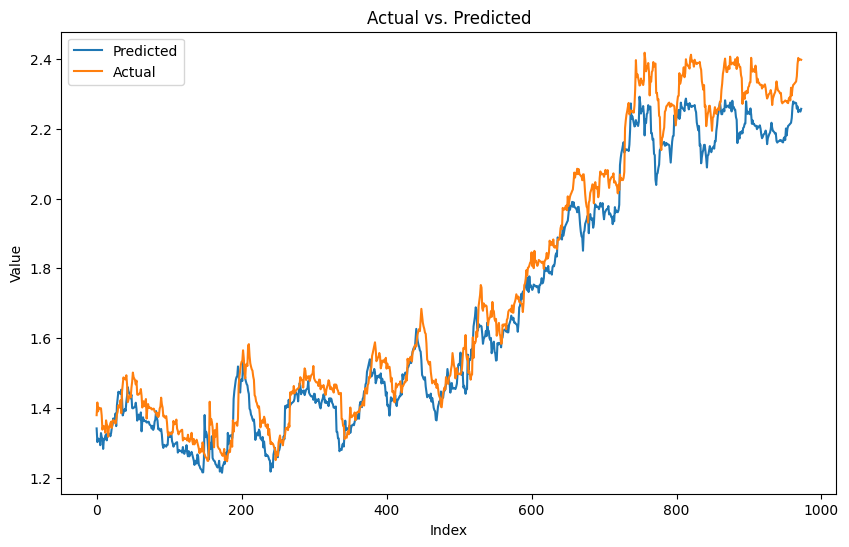

In [40]:
# Reshape y_test and y_pred to match the original shape

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_pred, label='Predicted')
plt.plot(y_test, label='Actual')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.title('Actual vs. Predicted')
plt.show()



### Model Evaluation

In [41]:
# Calculate R-squared (R²) score
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print("R-squared (R²) Score:", r2)
print("Mean Squared Error (MSE):", mse)

R-squared (R²) Score: 0.9520150669278382
Mean Squared Error (MSE): 0.007261987883773512


## Multi layer Dense Network

### Model Training

In [42]:
# Clear the existing TensorFlow graph and reset the Keras session
K.clear_session()

# Create the sequential model
model = Sequential()

# Add dense layers
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

# Make predictions on X_test
y_pred = model.predict(X_test)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


245/245 [==============================] - 2s 3ms/step - loss: 0.0283
Epoch 2/20
245/245 [==============================] - 1s 2ms/step - loss: 0.0047
Epoch 3/20
245/245 [==============================] - 1s 3ms/step - loss: 0.0050
Epoch 4/20
245/245 [==============================] - 1s 3ms/step - loss: 0.0046
Epoch 5/20
245/245 [==============================] - 1s 3ms/step - loss: 0.0051
Epoch 6/20
245/245 [==============================] - 1s 3ms/step - loss: 0.0047
Epoch 7/20
245/245 [==============================] - 1s 3ms/step - loss: 0.0056
Epoch 8/20
245/245 [==============================] - 1s 3ms/step - loss: 0.0047
Epoch 9/20
245/245 [==============================] - 1s 4ms/step - loss: 0.0049
Epoch 10/20
245/245 [==============================] - 1s 5ms/step - loss: 0.0048
Epoch 11/20
245/245 [==============================] - 1s 4ms/step - loss: 0.0048
Epoch 12/20
245/245 [==============================] - 1s 3ms/step - loss: 0.0056
Epoch 13/20
245/245 [===============

### Actual vs Predicted Graph

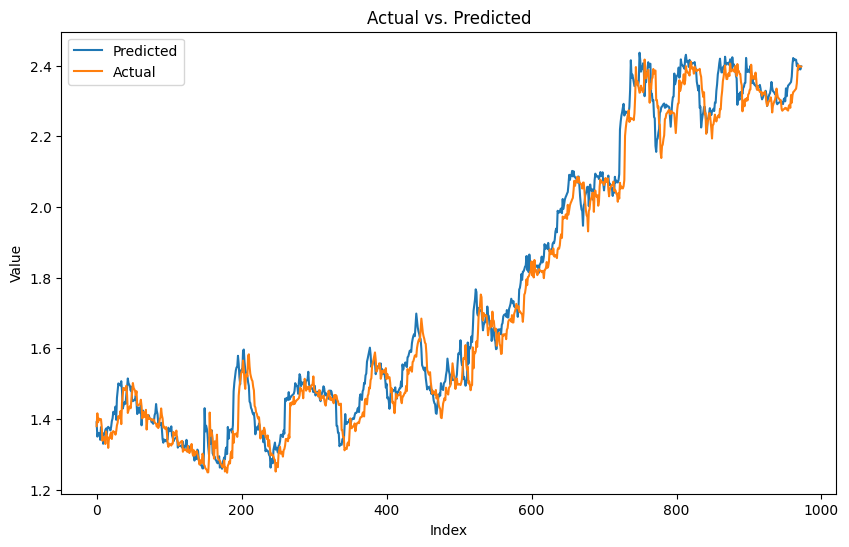

In [43]:
# Reshape y_test and y_pred to match the original shape
y_test = y_test.reshape(-1)
y_pred = y_pred.reshape(-1)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_pred, label='Predicted')
plt.plot(y_test, label='Actual')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.title('Actual vs. Predicted')
plt.show()



### Model Evaluation

In [44]:
# Calculate R-squared (R²) score
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print("R-squared (R²) Score:", r2)
print("Mean Squared Error (MSE):", mse)


R-squared (R²) Score: 0.9771157238244432
Mean Squared Error (MSE): 0.003463281611040348


### Model Summary

In [45]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


## Simple RNN

### Model Training

In [46]:
# Clear the existing TensorFlow graph and reset the Keras session
K.clear_session()

# Create the sequential model
model = Sequential()

# Add SimpleRNN layers with dropout regularization
model.add(SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(64))
model.add(Dropout(0.2))


# Add dense layers
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=16, epochs=28, verbose=1)

# Make predictions on X_test
y_pred = model.predict(X_test)


Epoch 1/28


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


245/245 [==============================] - 4s 4ms/step - loss: 0.0643
Epoch 2/28
245/245 [==============================] - 1s 4ms/step - loss: 0.0373
Epoch 3/28
245/245 [==============================] - 1s 4ms/step - loss: 0.0311
Epoch 4/28
245/245 [==============================] - 1s 4ms/step - loss: 0.0289
Epoch 5/28
245/245 [==============================] - 1s 4ms/step - loss: 0.0259
Epoch 6/28
245/245 [==============================] - 1s 4ms/step - loss: 0.0274
Epoch 7/28
245/245 [==============================] - 1s 4ms/step - loss: 0.0245
Epoch 8/28
245/245 [==============================] - 2s 6ms/step - loss: 0.0247
Epoch 9/28
245/245 [==============================] - 2s 6ms/step - loss: 0.0238
Epoch 10/28
245/245 [==============================] - 1s 4ms/step - loss: 0.0241
Epoch 11/28
245/245 [==============================] - 1s 4ms/step - loss: 0.0228
Epoch 12/28
245/245 [==============================] - 1s 4ms/step - loss: 0.0212
Epoch 13/28
245/245 [===============

### Actual vs Predicted Graph


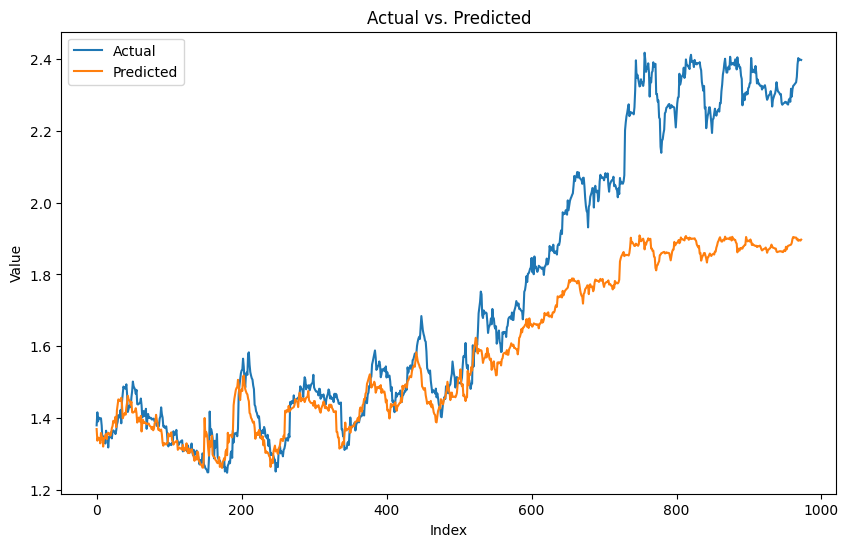

In [47]:
# Reshape y_test and y_pred to match the original shape
y_test = y_test.reshape(-1)
y_pred = y_pred.reshape(-1)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.title('Actual vs. Predicted')
plt.show()


### Model Evaluation


In [48]:
# Calculate R-squared (R²) score
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print("R-squared (R²) Score:", r2)
print("Mean Squared Error (MSE):", mse)


R-squared (R²) Score: 0.6125243347850607
Mean Squared Error (MSE): 0.05864014818602309


### Model Summary

In [49]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 64)             4224      
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 1, 64)             8256      
                                                                 
 dropout_1 (Dropout)         (None, 1, 64)             0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 1, 64)             8256      
                                                                 
 dropout_2 (Dropout)         (None, 1, 64)             0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 64)                8

## Data for LSTM Time Series Generator (rolling window)

In [50]:
# Length of X to be fed
n_input = 10

#Length of y to be fed
n_features = 1

#Data generator
generator = TimeseriesGenerator(train_price_scaled, train_price_scaled, length=n_input, batch_size=1)

In [51]:
# Basic check of how data looks now
X,y = generator[2]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[-1.60917346 -1.61763515 -1.62752545 -1.68357045 -1.68851559 -1.70829618
 -1.7039005  -1.70774672 -1.73137354 -1.68741667]
Predict this y: 
 [[-1.70554888]]


In [52]:
X.shape, y.shape

((1, 10, 1), (1, 1))

## LSTM Model

### Model Training

In [53]:
# Clear the existing TensorFlow graph and reset the Keras session
K.clear_session()

# Model define
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(n_input, n_features), return_sequences=True))
model.add(LSTM(64, activation='relu'))
model.add(Dense(1))

# Model Compile
model.compile(optimizer='adam', loss='mse')

# Define early stopping criteria
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)

# Fit the LSTM model
model.fit(generator, epochs=50, batch_size=16, verbose=1, shuffle=False, callbacks=[early_stop])

# Model Summary
model.summary()

Epoch 1/50
3908/3908 [==============================] - 49s 12ms/step - loss: 0.0120
Epoch 2/50
3908/3908 [==============================] - 47s 12ms/step - loss: 0.0433
Epoch 3/50
3908/3908 [==============================] - 45s 12ms/step - loss: 0.0264
Epoch 4/50
3908/3908 [==============================] - 45s 11ms/step - loss: 0.0063
Epoch 5/50
3908/3908 [==============================] - 44s 11ms/step - loss: 0.0057
Epoch 6/50
3908/3908 [==============================] - 44s 11ms/step - loss: 0.0053
Epoch 7/50
3908/3908 [==============================] - 43s 11ms/step - loss: 0.0052
Epoch 8/50
3908/3908 [==============================] - 44s 11ms/step - loss: 0.0051
Epoch 9/50
3908/3908 [==============================] - 42s 11ms/step - loss: 0.0045
Epoch 10/50
3908/3908 [==============================] - 41s 11ms/step - loss: 0.0047
Epoch 11/50
3908/3908 [==============================] - 41s 11ms/step - loss: 0.0045
Epoch 12/50
3908/3908 [==============================] - 44s 11

### Loss Per Epoch

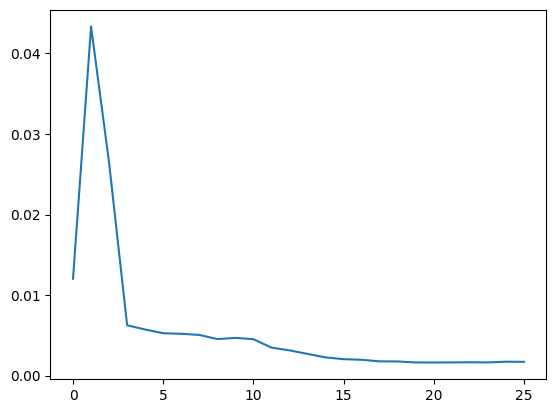

In [54]:
# Loss change per epoch graph

loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

### Predicting 100 Future Values and evaluation

In [55]:
test_predictions = []
pred_no_val=len(test_price)
first_eval_batch = train_price_scaled[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
# len(test_price_scaled)
for i in range(pred_no_val):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

true_predictions = scaler.inverse_transform(test_predictions)

1/1 [==============================] - 0s 35ms/step


### Model Evaluation

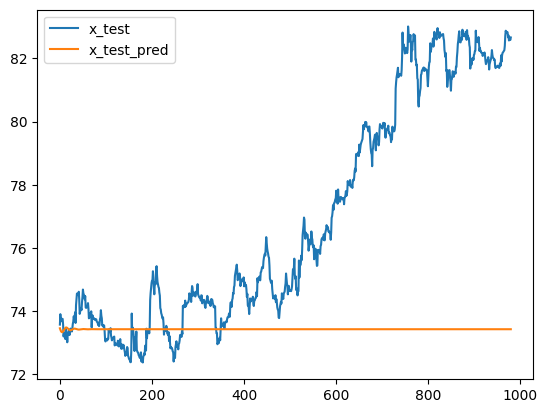

In [56]:
# plt.plot(test_predictions, test_price)
test_orignal=test_price[:pred_no_val]
plt.plot(test_orignal, label='x_test')
plt.plot(true_predictions, label='x_test_pred')
plt.legend()

In [57]:
len(test_orignal)

980

In [58]:
# Calculate R-squared (R²) score
r2 = r2_score(test_orignal, true_predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_orignal, true_predictions)

# Print the evaluation metrics
print("R-squared (R²) Score:", r2)
print("Mean Squared Error (MSE):", mse)

R-squared (R²) Score: -0.9568154344877084
Mean Squared Error (MSE): 24.810284028165857
